In [11]:
import sys
import os

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print("Current directory:", current_dir)

# 프로젝트 루트 디렉토리를 Python 경로에 추가
project_root = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(project_root)

Current directory: /UHome/qtly_u/Predictive_Maintenance/image_preprocessing/image_processing


In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import random
from func.processing_func import *
from func.func import *
# from func import apply_clahe_color
import json

In [14]:
bbox_df = pd.read_csv("../dataset/df_0305_added_bbox.csv")
bbox_df.columns

Index(['image_file', 'bbox_id', 'score', 'width', 'height', 'bbox_size',
       'entropy', 'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green',
       'color_var', 'contrast', 'img_size', 'edge_intensity', 'saturation',
       'sift', 'psnr', 'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop',
       'ASM', 'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

In [84]:
# bbox_df[bbox_df['score']!=0]

6334


<Axes: >

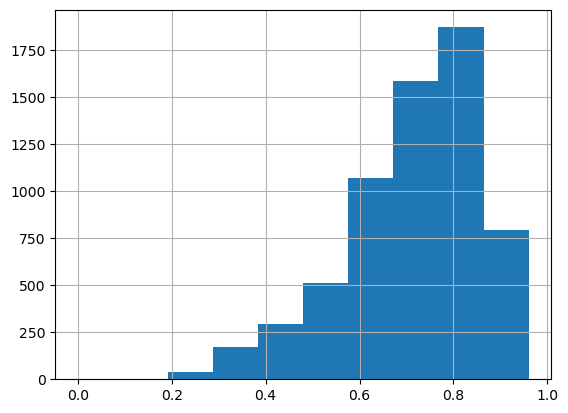

In [15]:
print(len(bbox_df))
bbox_df['score'].hist()

In [16]:
# 하위 10%의 threshold
low_threshold = np.percentile(bbox_df['score'], 10)

In [17]:
# 상위 10%의 threshold
high_threshold = np.percentile(bbox_df['score'], 90)

In [18]:
low_score = bbox_df[bbox_df['score']<low_threshold]
high_score = bbox_df[bbox_df['score']>high_threshold]

In [19]:
low_score.columns

Index(['image_file', 'bbox_id', 'score', 'width', 'height', 'bbox_size',
       'entropy', 'laplacian', 'brightness', 'B_sd', 'red', 'blue', 'green',
       'color_var', 'contrast', 'img_size', 'edge_intensity', 'saturation',
       'sift', 'psnr', 'centroid_l', 'c_moment_x', 'c_moment_y', 'bbox_prop',
       'ASM', 'Contrast', 'Correlation', 'Variance', 'IDM', 'Sum_Average',
       'Sum_Variance', 'Sum_Entropy', 'Entropy', 'Difference_Variance',
       'Difference_Entropy', 'IMC1', 'IMC2', 'bbox'],
      dtype='object')

/UHome/qtly_u/.conda/envs/pm39/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/UHome/qtly_u/.conda/envs/pm39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


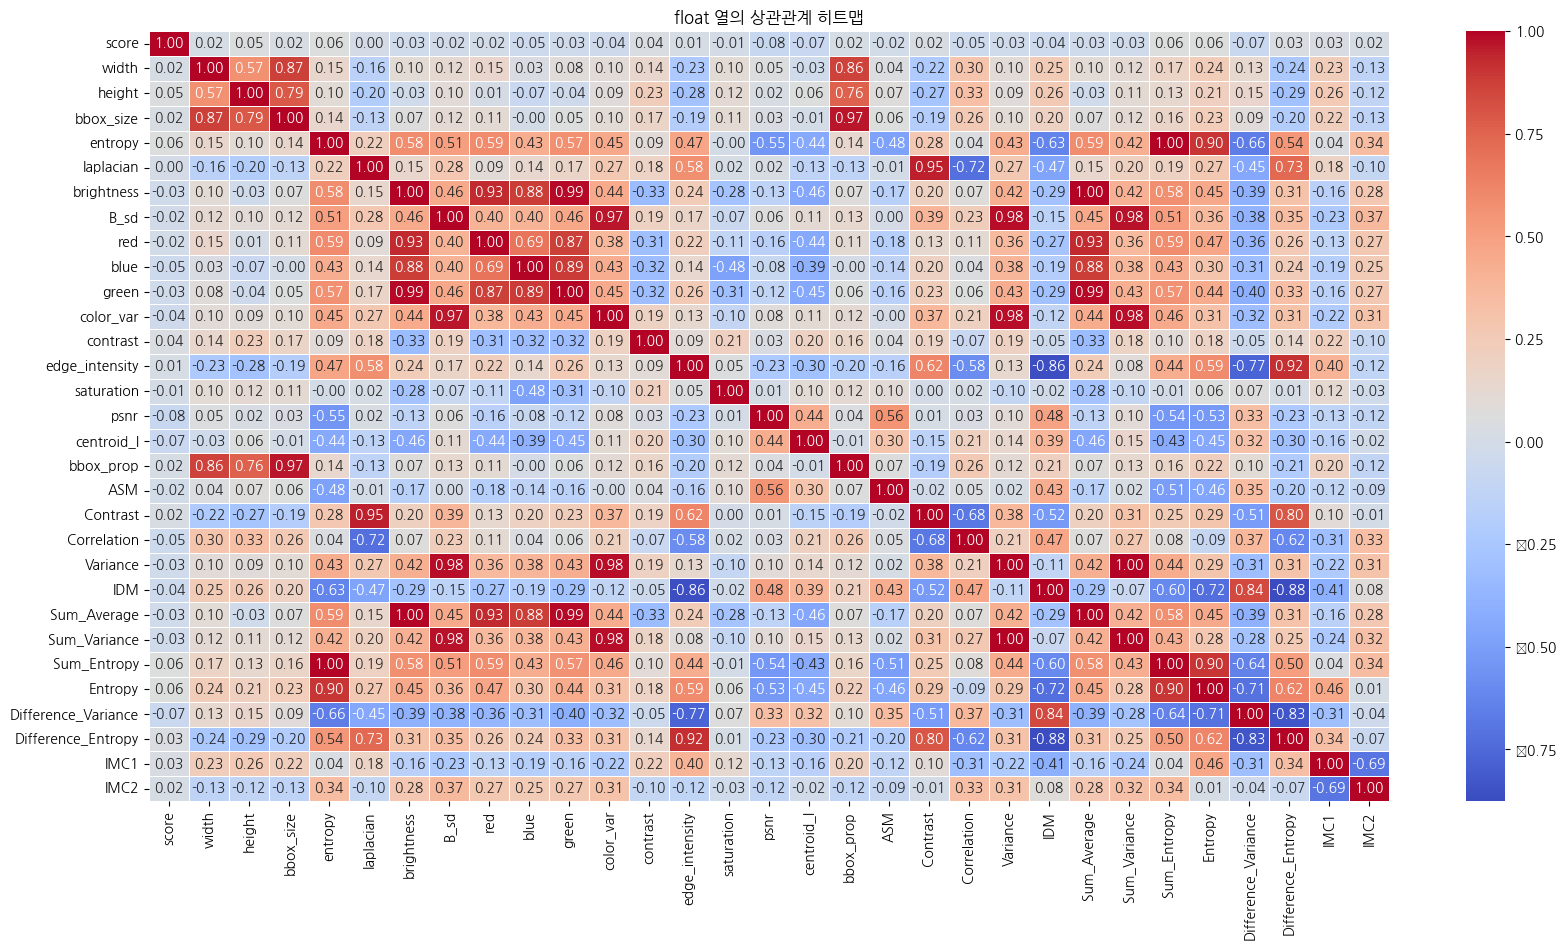

In [20]:
# float 열만 선택
float_columns = low_score.select_dtypes(include=['float64'])

# 상관관계 행렬 계산
correlation_matrix = float_columns.corr()

# 상관관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('float 열의 상관관계 히트맵')
plt.show()

선정된 feature 13개를 기준으로 조사할 예정
- c_moment_y, c_moment_x, Contrast, sift, Correlation, Difference_Entropy, Laplacian, bbox_prop, blue, green, edge_intensity, saturation, centroid_l


In [23]:
bbox_df

,image_file,bbox_id,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,...,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2,bbox
0,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,0,0.960156,175.78,365.92,64321.4176,6.991802,2396.599312,109.016344,55.437876,...,0.272328,218.321967,11805.860404,7.976299,11.780171,0.000351,4.483578,-0.316311,0.993586,"[231.39, 23.32, 175.78, 365.92]"
1,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,0,0.946107,175.98,269.79,47477.6442,7.640442,4402.490432,136.528625,57.042084,...,0.086307,272.560296,12048.803662,8.617964,13.766669,0.000097,5.728885,-0.197973,0.974561,"[222.64, 85.72, 175.98, 269.79]"
2,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,4,0.945302,247.26,443.74,109719.1524,7.261376,1511.846484,138.665786,52.863906,...,0.255842,277.354480,10746.326177,8.235842,12.028241,0.000368,4.271601,-0.343483,0.996333,"[39.11, 48.82, 247.26, 443.74]"
3,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,0,0.942805,125.15,386.46,48365.4690,7.541892,7403.016087,98.924808,55.624675,...,0.101048,198.059275,11180.774590,8.463239,13.577417,0.000113,5.674594,-0.199670,0.974415,"[195.29, 211.79, 125.15, 386.46]"
4,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,0,0.941582,131.46,228.37,30021.5202,7.315833,3676.558615,153.935550,39.944085,...,0.084901,307.765087,5720.189042,8.223095,13.280933,0.000107,5.537443,-0.185451,0.964452,"[274.43, 78.75, 131.46, 228.37]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,5,0.213297,47.54,96.43,4584.2822,7.415219,2726.790261,113.640957,62.153958,...,0.084240,230.110439,14690.525488,8.309641,12.197246,0.000120,5.515458,-0.355074,0.997393,"[406.07, 0, 47.54, 96.43]"
6330,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,1,0.212928,80.53,135.90,10944.0270,4.793607,40.994660,35.096204,63.665830,...,0.519975,68.458457,15714.912591,5.674219,7.333457,0.001055,2.768688,-0.457672,0.993321,"[0, 0, 80.53, 135.9]"
6331,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,10,0.201631,69.67,65.00,4528.5500,7.348773,3286.761896,97.960981,43.993721,...,0.099488,196.412494,7113.236356,8.251805,12.176833,0.000166,5.272366,-0.342831,0.996724,"[408.33, 362.5, 69.67, 65]"
6332,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,3,0.000000,54.45,68.97,3755.4165,7.028843,2668.430888,68.552560,36.803310,...,0.080346,137.449227,4894.450460,7.910967,11.888867,0.000140,5.312292,-0.308051,0.993357,"[228.5, 91.8, 54.45, 68.97]"


## Contrast를 높이는 processing

<Axes: >

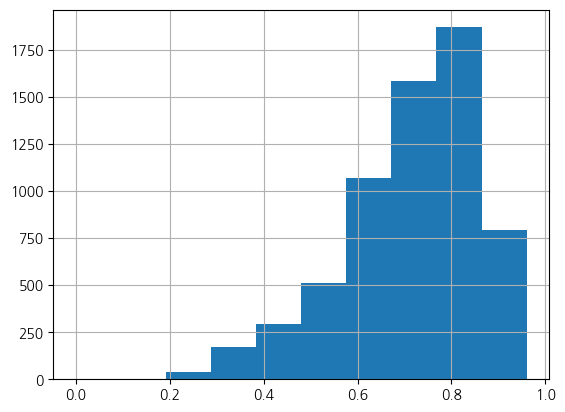

In [25]:
bbox_df['score'].hist()

In [26]:
# 하위 10%의 threshold
threshold = np.percentile(bbox_df['score'], 10)
sample_df = bbox_df[bbox_df['score']<threshold]

In [27]:
sample_df.score

5700    0.508359
5701    0.508163
5702    0.508098
5703    0.507484
5704    0.507432
          ...   
6329    0.213297
6330    0.212928
6331    0.201631
6332    0.000000
6333    0.000000
Name: score, Length: 634, dtype: float64

In [28]:
sample_df.reset_index(drop=True, inplace=True)
sample_df

,image_file,bbox_id,score,width,height,bbox_size,entropy,laplacian,brightness,B_sd,...,IDM,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,IMC1,IMC2,bbox
0,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,1,0.508359,57.67,221.80,12791.2060,6.662393,129.946695,70.263317,31.287441,...,0.258267,140.196588,3810.424480,7.617877,10.760104,0.000439,3.592545,-0.381698,0.996750,"[495.77, 54.65, 57.67, 221.8]"
1,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,6,0.508163,92.25,38.01,3506.4225,7.191019,1732.155302,70.538616,53.440060,...,0.161669,137.910123,9679.152265,8.068442,11.419828,0.000204,4.954288,-0.405283,0.998442,"[407.75, 294.05, 92.25, 38.01]"
2,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,2,0.508098,99.64,107.15,10676.4260,7.875348,6235.422894,116.039460,74.546275,...,0.064322,232.415271,20554.327924,8.812095,13.391303,0.000073,6.080324,-0.299745,0.995511,"[237.45, 46.43, 99.64, 107.15]"
3,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,0,0.507484,207.73,259.43,53891.3939,6.103002,30.232000,55.503441,62.683885,...,0.420845,110.358050,15617.042600,7.051734,9.505779,0.000978,3.133710,-0.440712,0.997555,"[196.25, 1.91, 207.73, 259.43]"
4,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,4,0.507432,31.37,265.27,8321.5199,7.416281,5797.366139,78.892757,55.694129,...,0.116463,157.977287,11199.514353,8.295836,12.455892,0.000121,5.635846,-0.320120,0.995594,"[396.63, 28.34, 31.37, 265.27]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,5,0.213297,47.54,96.43,4584.2822,7.415219,2726.790261,113.640957,62.153958,...,0.084240,230.110439,14690.525488,8.309641,12.197246,0.000120,5.515458,-0.355074,0.997393,"[406.07, 0, 47.54, 96.43]"
630,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,1,0.212928,80.53,135.90,10944.0270,4.793607,40.994660,35.096204,63.665830,...,0.519975,68.458457,15714.912591,5.674219,7.333457,0.001055,2.768688,-0.457672,0.993321,"[0, 0, 80.53, 135.9]"
631,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,10,0.201631,69.67,65.00,4528.5500,7.348773,3286.761896,97.960981,43.993721,...,0.099488,196.412494,7113.236356,8.251805,12.176833,0.000166,5.272366,-0.342831,0.996724,"[408.33, 362.5, 69.67, 65]"
632,/UHome/qtly_u/3D_Bio_Object_Detection/ViTPose/...,3,0.000000,54.45,68.97,3755.4165,7.028843,2668.430888,68.552560,36.803310,...,0.080346,137.449227,4894.450460,7.910967,11.888867,0.000140,5.312292,-0.308051,0.993357,"[228.5, 91.8, 54.45, 68.97]"


In [29]:
# low_score image file 따로 저장
from PIL import Image
import io
import os

for index, row in sample_df.iterrows():
    image_path = row['image_file']

    if not os.path.exists("low_score_valid"):
        os.mkdir("low_score_valid")

    # 이미지 읽기
    img = cv2.imread(image_path)

    # 결과 이미지 저장
    output_path = os.path.join("low_score", os.path.basename(image_path))
    cv2.imwrite(output_path, img)

In [36]:
# low_score image 전처리 후 이미지 저장 
from PIL import Image
import io

for index, row in sample_df.iterrows():
    image_path = row['image_file']
    
    # 이미지 읽어오기
    with open(image_path, 'rb') as f:
        img_data = io.BytesIO(f.read())
        img = Image.open(img_data)

    apply_clahe_color(image_path, "output_folder", clip_limit=2.0, tile_grid_size=(8, 8), brightness_factor=1.)
